✅ Successfully loaded dataset.

🔄 Starting data preprocessing...
✅ Data preprocessing complete.

Data split into training (11496 rows) and testing (2874 rows).

PART 1: REGRESSION ANALYSIS (Predicting Exact Production)

⏳ Training RandomForest Regressor for Production...


/tmp/ipykernel_8030/4143207245.py:76: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  if col in df.columns: df[col].fillna(df[col].mode()[0], inplace=True)
/tmp/ipykernel_8030/4143207245.py:78: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(valu

✅ RandomForest Regressor training complete.

--- RandomForest Regressor (Production) Evaluation ---
R-squared (R²): 0.984
Mean Absolute Error (MAE): 2,551.44
----------------------------------------------------

Comparison of first 10 predictions (RandomForest):
   Actual Production  Predicted Production (RF)
0              199.0                     202.87
1            35507.0                   39308.08
2             4952.0                    7485.58
3              347.0                     353.22
4             9468.0                    8023.79
5              446.0                     543.44
6             4171.0                    3894.58
7              140.0                     143.03
8            10676.0                   10554.86
9            24775.0                   21173.14


⏳ Scaling features for KNN...
⏳ Training KNN Regressor...
✅ KNN Regressor training complete.

--- KNN Regressor Evaluation ---
R-squared (R²): 0.977
Mean Absolute Error (MAE): 3,172.93
----------------------

/tmp/ipykernel_8030/4143207245.py:192: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(class_f1_scores.keys()), y=list(class_f1_scores.values()), palette='viridis')


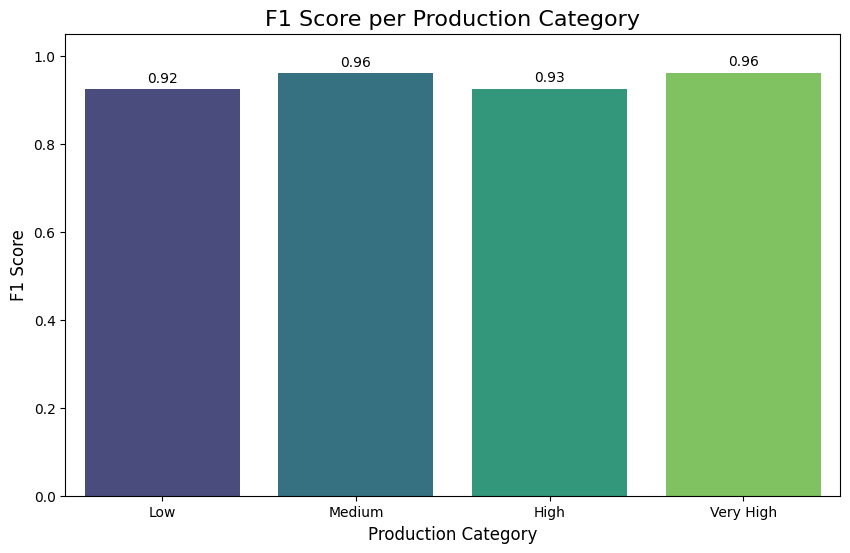

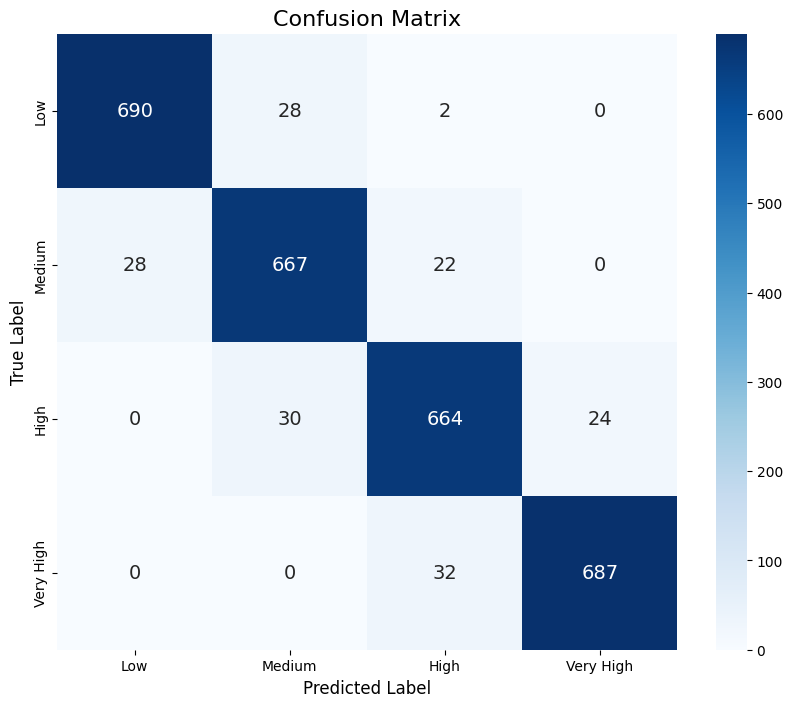


************************************************************
       REAL-LIFE PRODUCTIVITY PREDICTION MODEL
************************************************************

Available Districts:
 ['Alappuzha', 'Ernakulam', 'Idukki', 'Kannur', 'Kasaragod', 'Kollam', 'Kottayam', 'Kozhikode', 'Malappuram', 'Palakkad', 'Pathanamthitta', 'Thiruvananthapuram', 'Thrissur', 'Wayanad']

Available Crops:
 ['Arecanut', 'Banana', 'Betel leaves', 'Cardamom', 'Cashew', 'Cloves', 'Cocoa', 'Coconut', 'Coffee', 'Ginger', 'Jack', 'Mango', 'Nutmeg', 'Paddy', 'Pappaya', 'Pepper', 'Pineapple', 'Plantain', 'Rubber', 'Tapioca', 'Tea', 'Turmeric']
Invalid crop. Please choose from the list above.

PART 3: UPCOMING PRODUCTIVITY PREDICTION

➡️ Prediction for Year 2024:
   - District: Idukki
   - Crop: Betel leaves
   - Area: 1245.0 Hectares
--------------------------------------------------
   Predicted Productivity: 24860.19 Kg/Hectare

Exiting prediction model. Goodbye!


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Regression Models and Metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Classification Models and Metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

def predict_upcoming_productivity(district, crop, area, model, training_columns):
    """
    Predicts the upcoming productivity for a given district, crop, and area.

    Args:
        district (str): The name of the district.
        crop (str): The name of the crop.
        area (float): The area of cultivation.
        model (RandomForestRegressor): The trained productivity prediction model.
        training_columns (list): The column names the model was trained on.
    """
    # Create a DataFrame from the input
    upcoming_year = 2024 # Predict for the next year
    input_data = pd.DataFrame({
        'District': [district],
        'Crop': [crop],
        'Area': [area],
        'Year': [upcoming_year]
    })

    # One-hot encode the categorical features
    input_processed = pd.get_dummies(input_data)

    # Align the columns of the input data with the training data
    input_aligned = input_processed.reindex(columns=training_columns, fill_value=0)

    # Predict the productivity
    predicted_productivity = model.predict(input_aligned)

    print("\n" + "="*50)
    print("PART 3: UPCOMING PRODUCTIVITY PREDICTION")
    print("="*50)
    print(f"\n➡️ Prediction for Year {upcoming_year}:")
    print(f"   - District: {district}")
    print(f"   - Crop: {crop}")
    print(f"   - Area: {area} Hectares")
    print("--------------------------------------------------")
    print(f"   Predicted Productivity: {predicted_productivity[0]:.2f} Kg/Hectare")
    print("==================================================")


def run_comprehensive_analysis(file_path='dataset.csv'):
    """
    Loads data and runs a full analysis:
    1. Trains and evaluates two regression models (Random Forest, KNN).
    2. Converts to a classification problem and evaluates a classifier.
    3. Shows 10 sample predictions for each model.
    4. Visualizes classification performance with graphs.
    5. Trains a model for productivity prediction.
    """
    try:
        # --- 1. Load and Preprocess Data (Common for all models) ---
        df = pd.read_csv(file_path)
        print("✅ Successfully loaded dataset.")

        print("\n🔄 Starting data preprocessing...")
        df['Year'] = df['Agriculture Year'].apply(lambda x: int(str(x).split('-')[0]))
        df.dropna(subset=['Production', 'Productivity'], inplace=True)

        for col in ['District', 'Crop']:
            if col in df.columns: df[col].fillna(df[col].mode()[0], inplace=True)
        for col in ['Area']: # Only Area needs filling for features
            if col in df.columns: df[col].fillna(df[col].mean(), inplace=True)

        categorical_cols = ['District', 'Crop']
        if 'Season' in df.columns: categorical_cols.append('Season')
        df_processed = pd.get_dummies(df.copy(), columns=categorical_cols, drop_first=True)
        print("✅ Data preprocessing complete.")

        # --- Base Features and Target for Regression ---
        cols_to_drop = ['Production', 'Agriculture Year', 'Area Unit', 'Production Unit', 'Productivity Unit', 'Productivity']
        X = df_processed.drop(columns=[col for col in cols_to_drop if col in df_processed.columns])
        y_reg = df_processed['Production']
        X_train, X_test, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.2, random_state=42)

        print(f"\nData split into training ({len(X_train)} rows) and testing ({len(X_test)} rows).")

        print("\n" + "="*50)
        print("PART 1: REGRESSION ANALYSIS (Predicting Exact Production)")
        print("="*50)

        # --- 1a. RandomForest Regressor for Production---
        print("\n⏳ Training RandomForest Regressor for Production...")
        rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
        rf_regressor.fit(X_train, y_train_reg)
        rf_predictions = rf_regressor.predict(X_test)
        rf_r2 = r2_score(y_test_reg, rf_predictions)
        rf_mae = mean_absolute_error(y_test_reg, rf_predictions)
        print("✅ RandomForest Regressor training complete.")
        print("\n--- RandomForest Regressor (Production) Evaluation ---")
        print(f"R-squared (R²): {rf_r2:.3f}")
        print(f"Mean Absolute Error (MAE): {rf_mae:,.2f}")
        print("----------------------------------------------------")

        rf_results_df = pd.DataFrame({
            'Actual Production': y_test_reg.head(10).values,
            'Predicted Production (RF)': rf_predictions[:10]
        })
        rf_results_df['Predicted Production (RF)'] = rf_results_df['Predicted Production (RF)'].round(2)
        print("\nComparison of first 10 predictions (RandomForest):")
        print(rf_results_df)

        # --- 1b. KNN Regressor ---
        print("\n\n⏳ Scaling features for KNN...")
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        print("⏳ Training KNN Regressor...")
        knn_regressor = KNeighborsRegressor(n_neighbors=5, n_jobs=-1)
        knn_regressor.fit(X_train_scaled, y_train_reg)
        knn_predictions = knn_regressor.predict(X_test_scaled)
        knn_r2 = r2_score(y_test_reg, knn_predictions)
        knn_mae = mean_absolute_error(y_test_reg, knn_predictions)
        print("✅ KNN Regressor training complete.")
        print("\n--- KNN Regressor Evaluation ---")
        print(f"R-squared (R²): {knn_r2:.3f}")
        print(f"Mean Absolute Error (MAE): {knn_mae:,.2f}")
        print("------------------------------")

        knn_results_df = pd.DataFrame({
            'Actual Production': y_test_reg.head(10).values,
            'Predicted Production (KNN)': knn_predictions[:10]
        })
        knn_results_df['Predicted Production (KNN)'] = knn_results_df['Predicted Production (KNN)'].round(2)
        print("\nComparison of first 10 predictions (KNN):")
        print(knn_results_df)

        # --- 1c. RandomForest Regressor for Productivity ---
        print("\n\n⏳ Training RandomForest Regressor for Productivity...")
        y_prod = df_processed['Productivity'] # Target is Productivity
        X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X, y_prod, test_size=0.2, random_state=42)
        rf_productivity_regressor = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
        rf_productivity_regressor.fit(X_train_p, y_train_p)
        print("✅ RandomForest Regressor for Productivity training complete.")


        print("\n" + "="*50)
        print("PART 2: CLASSIFICATION ANALYSIS (Predicting Production Category)")
        print("="*50)

        # --- 2a. Create Classification Target ---
        print("\n🔄 Converting 'Production' into classification categories...")
        bin_labels = ['Low', 'Medium', 'High', 'Very High']
        df['Production_Category'] = pd.qcut(df['Production'], q=4, labels=bin_labels, duplicates='drop')
        y_clf = df_processed.join(df['Production_Category'])['Production_Category']
        print("✅ Production Categories created:")
        print(y_clf.value_counts())

        # --- 2b. Split Data for Classification ---
        X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X, y_clf, test_size=0.2, random_state=42, stratify=y_clf)

        # --- 2c. RandomForest Classifier ---
        print("\n⏳ Training RandomForest Classifier...")
        rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
        rf_classifier.fit(X_train_clf, y_train_clf)
        clf_predictions = rf_classifier.predict(X_test_clf)
        accuracy = accuracy_score(y_test_clf, clf_predictions)
        f1 = f1_score(y_test_clf, clf_predictions, average='weighted')
        print("✅ RandomForest Classifier training complete.")
        print("\n--- RandomForest Classifier Evaluation ---")
        print(f"Accuracy: {accuracy:.2%}")
        print(f"F1 Score (Weighted): {f1:.3f}")
        print("----------------------------------------")

        clf_results_df = pd.DataFrame({
            'Actual Category': y_test_clf.head(10).values,
            'Predicted Category': clf_predictions[:10]
        })
        print("\nComparison of first 10 predictions (Classifier):")
        print(clf_results_df)

        # --- 2d. Generate and Visualize Classification Performance ---
        print("\n📊 Generating classification performance graphs...")
        report_dict = classification_report(y_test_clf, clf_predictions, target_names=bin_labels, output_dict=True)
        class_f1_scores = {label: report_dict[label]['f1-score'] for label in bin_labels}
        plt.figure(figsize=(10, 6))
        sns.barplot(x=list(class_f1_scores.keys()), y=list(class_f1_scores.values()), palette='viridis')
        plt.title('F1 Score per Production Category', fontsize=16)
        plt.xlabel('Production Category', fontsize=12)
        plt.ylabel('F1 Score', fontsize=12)
        plt.ylim(0, 1.05)
        for index, value in enumerate(list(class_f1_scores.values())):
            plt.text(index, value + 0.01, f"{value:.2f}", ha='center', va='bottom')
        plt.show()

        cm = confusion_matrix(y_test_clf, clf_predictions, labels=bin_labels)
        plt.figure(figsize=(10, 8))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=bin_labels, yticklabels=bin_labels, annot_kws={"size": 14})
        plt.title('Confusion Matrix', fontsize=16)
        plt.xlabel('Predicted Label', fontsize=12)
        plt.ylabel('True Label', fontsize=12)
        plt.show()

        # --- Return the trained model and columns for prediction ---
        return rf_productivity_regressor, X.columns

    except FileNotFoundError:
        print(f"❌ Error: The file '{file_path}' was not found. Please ensure it's in the correct directory.")
        return None, None
    except Exception as e:
        print(f"❌ An error occurred during the process: {e}")
        return None, None

# --- Run the entire analysis ---
if __name__ == '__main__':
    # Run the main analysis which also trains and returns the productivity model
    productivity_model, model_columns = run_comprehensive_analysis()

    # Check if the model was trained successfully before making a prediction
    if productivity_model and model_columns is not None:

        # --- Interactive Prediction Loop ---
        # Load data once to get available options for user
        try:
            df_options = pd.read_csv('dataset.csv')
            unique_districts = sorted(df_options['District'].unique())
            unique_crops = sorted(df_options['Crop'].unique())
        except Exception:
            unique_districts = ['Palakkad', 'Thrissur', 'Kollam'] # Fallback
            unique_crops = ['Paddy', 'Nutmeg', 'Betel leaves'] # Fallback

        while True:
            print("\n" + "*"*60)
            print("       REAL-LIFE PRODUCTIVITY PREDICTION MODEL")
            print("*"*60)

            # --- Get District Input ---
            print("\nAvailable Districts:\n", unique_districts)
            district_input = input(f"\nEnter a district name: ")
            while district_input not in unique_districts:
                print("Invalid district. Please choose from the list above.")
                district_input = input(f"Enter a district name: ")

            # --- Get Crop Input ---
            print("\nAvailable Crops:\n", unique_crops)
            crop_input = input(f"Enter a crop name for '{district_input}': ")
            while crop_input not in unique_crops:
                print("Invalid crop. Please choose from the list above.")
                crop_input = input(f"Enter a crop name for '{district_input}': ")

            # --- Get Area Input ---
            while True:
                try:
                    area_input = float(input(f"Enter the cultivation area in Hectares for '{crop_input}': "))
                    if area_input > 0:
                        break
                    else:
                        print("Area must be a positive number.")
                except ValueError:
                    print("Invalid input. Please enter a numerical value for area.")

            # --- Make the Prediction ---
            predict_upcoming_productivity(
                district=district_input,
                crop=crop_input,
                area=area_input,
                model=productivity_model,
                training_columns=model_columns
            )

            # --- Ask to Continue ---
            another = input("\nDo you want to make another prediction? (yes/no): ").lower()
            if another != 'yes':
                print("\nExiting prediction model. Goodbye!")
                break

